In [2]:
# data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# errors
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics 
from sklearn import svm
# polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
# RFR
from sklearn.ensemble import RandomForestRegressor
# KNN
from sklearn.neighbors import KNeighborsRegressor
# RN
from sklearn.neighbors import RadiusNeighborsRegressor 
# VS
from sklearn import svm
# Linear
from sklearn.linear_model import LinearRegression
# debug
import pdb


# Setting Data

In [3]:
# filter dataset by class number 
def filtering ( dataset, num):
    dataset = dataset[dataset['class_number'] == num]
    return dataset

# filtering out rows that contains less than 10 objects and combine it into one column
def filtering2 (dataset, class_number):
    other = []
    for i in class_number:
        if (len(dataset[dataset['class_number']== i]) < 10):
            other.append(i)
    return other


# Polynomial Regression

In [4]:
def polynomial (X_train,X_test, y_train, y_test, degree):
    poly_transform = PolynomialFeatures(degree = degree)
    
    linear_reg = linear_model.LinearRegression()
    poly_transform.fit(X_train)
    
    x_train_poly = poly_transform.transform(X_train)
    x_test_poly = poly_transform.transform(X_test)
    linear_reg.fit(x_train_poly, y_train)
    P_y_pred = linear_reg.predict(x_test_poly)
    #error reports
    P_RMSE = np.sqrt(mean_squared_error(y_test, P_y_pred)) #lower better
    P_r2 = r2_score(y_test, P_y_pred) #higher better
    P_MAE = mean_absolute_error(y_test, P_y_pred) #lower better
    
    #plot values
    plt.scatter(y_test, P_y_pred, color='blue')
    plt.plot([0, 300],[0, 300], color='red')

    plt.title('Poly Regression')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    
    print("Poly ", P_RMSE, P_r2, P_MAE)
    return P_RMSE, P_r2, P_MAE


# RandomForest Regression

In [5]:
def random_forest(X_train,X_test, y_train, y_test):
    RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    RFregressor.fit(X_train, y_train)

    RF_y_pred = RFregressor.predict(X_test)
    #error reports
    RF_RMSE = np.sqrt(mean_squared_error(y_test, RF_y_pred))
    RF_r2 = (r2_score(y_test, RF_y_pred))
    RF_MAE = mean_absolute_error(y_test, RF_y_pred)
    
    #plot values
    plt.scatter(y_test, RF_y_pred, color='blue')
    plt.plot([0, 300],[0, 300], color='red')

    plt.title('Random Forest Regression')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    print("RF ", RF_RMSE, RF_r2, RF_MAE )
    return RF_RMSE, RF_r2, RF_MAE

# K-NearestNeighbor Regression

In [6]:
def k_nearest_neighbor(X_train,X_test, y_train, y_test, n):
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(X_train, y_train)
    KNN_y_pred = knn.predict(X_test)
    
    #error reports
    KNN_RMSE = np.sqrt(mean_squared_error(y_test, KNN_y_pred))
    KNN_r2 = (r2_score(y_test, KNN_y_pred))
    KNN_MAE = mean_absolute_error(y_test, KNN_y_pred)
    #plot values
    plt.scatter(y_test, KNN_y_pred, color='blue')
    plt.plot([0, 300],[0, 300], color='red')

    plt.title('KNN Regression')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    print("KNN ", KNN_RMSE, KNN_r2, KNN_MAE)
    return KNN_RMSE, KNN_r2, KNN_MAE

# Vector Space Regression

In [7]:
def vector_space (X_train,X_test, y_train, y_test):
    vectorS = svm.SVC().fit(X_train, y_train)
    VS_y_pred = vectorS.predict(X_test)
    
    #error reports
    VS_RMSE = np.sqrt(mean_squared_error(y_test, VS_y_pred))
    VS_r2 = (r2_score(y_test, VS_y_pred))
    VS_MAE = mean_absolute_error(y_test, VS_y_pred)
    
    #plot values
    plt.scatter(y_test, VS_y_pred, color='blue')
    plt.plot([0, 300],[0, 300], color='red')

    plt.title('VS Regression')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    print("VS ",VS_RMSE, VS_r2, VS_MAE)
    return VS_RMSE, VS_r2, VS_MAE

# Linear Regression Regression

In [8]:
def linear (X_train,X_test, y_train, y_test):
    LR = LinearRegression().fit(X_train, y_train)
    LR_y_pred = LR.predict(X_test)
    
    #error reports
    LR_RMSE = np.sqrt(mean_squared_error(y_test, LR_y_pred))
    LR_r2 = (r2_score(y_test, LR_y_pred))
    LR_MAE = mean_absolute_error(y_test, LR_y_pred)
    #plot values
    plt.scatter(y_test, LR_y_pred, color='blue')
    plt.plot([0, 300],[0, 300], color='red')

    plt.title('Linear Regression')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    print("LR", LR_RMSE, LR_r2, LR_MAE)
    return LR_RMSE, LR_r2, LR_MAE

# RN

In [9]:
def radius_neighbor (X_train,X_test, y_train, y_test):
    RN = RadiusNeighborsRegressor(radius=5.0, weights='distance', algorithm='auto')
    RN.fit(X_train, y_train)
    RN_y_pred = RN.predict(X_test)

    RN_RMSE = np.sqrt(mean_squared_error(y_test, RN_y_pred))
    RN_r2 = (r2_score(y_test, RN_y_pred))
    RN_MAE = mean_absolute_error(y_test, RN_y_pred)

    #plot values
    plt.scatter(y_test, RN_y_pred, color='blue')
    plt.plot([0, 1000],[0, 1000], color='red')

    plt.title('Radius Neighbor Regression')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    print("RN", RN_RMSE, RN_r2, RN_MAE)
    return RN_RMSE, RN_r2, RN_MAE    

# Running Test(s) by classification

In [9]:
url = "data1&2.csv"

file_name= '/Users/myatwin/REU/Project/ObjRec/automl/efficientdet/Distance_Jupyter/compare_model.csv'
# df.to_csv(raw_data)

predictors = ["y_min_sqrt", "x_min_sqrt", "y_max_sqrt", "x_max_sqrt", "prediction", "class_number"]
csv_columns = ['data_set','class number', 'condition','error stats','linear', 'polynomial', 'vector_space','KNN','random_forest']
class_number = []
other = []
raw_data = {}
dataset = pd.read_csv(url)
class_number = dataset["class_number"].unique()
other = filtering2(dataset, class_number) 
final_list = [i for i in class_number if i not in other]
# other = [x in other for x in dataset['class_number']]
# other_data = dataset[other]# adding up

print("class_number: ", class_number)
print("other: ", other)
print("final_list", final_list )

# df = pd.DataFrame(raw_data, columns = csv_columns)
# df.to_csv(file_name)

# running all class numbers with more than 10 objects found
for index, i in enumerate(final_list):
    temp_dataset = filtering(dataset, i)
    print("temp_dataset: ")
    print(temp_dataset)
    # setting values for models
    X = temp_dataset[predictors].values
    y = temp_dataset["distance(inches)"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# saving model results into csv 
#     pdb.set_trace()
    raw_data = {
                'data_set': url,
                'class number': i, 
                'condition': str(predictors),   
                'error stats': ["RMSE", "r2", "MAE"],
                'linear': linear(X_train,X_test, y_train, y_test),
                'polynomial': polynomial(X_train,X_test, y_train, y_test, 3),
                'vector_space': vector_space(X_train,X_test, y_train, y_test),
                'KNN': k_nearest_neighbor(X_train,X_test, y_train, y_test, 10),
                'random_forest': random_forest(X_train,X_test, y_train, y_test)
                }
    

    
    df = pd.DataFrame(raw_data, columns = csv_columns)
    df.to_csv(file_name, mode = 'a', header = False)


# custom train/test datasets

In [10]:
url = "train_data.csv"
url2 = "test_data.csv"

file_name= '/Users/myatwin/REU/Project/ObjRec/automl/efficientdet/Distance_Jupyter/compare_model.csv'


# predictors = ["f1", "f2", "accuracy", "class_number"]
# predictors = ["y_min", "x_min", "y_max", "x_max", "accuracy", "class_number"]
predictors = ["y_min_sqrt", "x_min_sqrt", "y_max_sqrt", "x_max_sqrt", "accuracy", "class_number"]
csv_columns = ['data_set','class number', 'condition','error stats','linear', 'polynomial', 'vector_space','KNN','random_forest']
class_number = []
other = []
raw_data = {}

# training data
dataset = pd.read_csv(url)
a = [x in [1, 62, 15] for x in dataset['class_number']]
temp_dataset = dataset[a]


# training data
dataset2 = pd.read_csv(url2)
b = [z in [1, 62, 15] for z in dataset2['class_number']]
temp_dataset2 = dataset2[b]

# other = [x in other for x in dataset['class_number']]
# other_data = dataset[other]# adding up


# df = pd.DataFrame(raw_data, columns = csv_columns)
# df.to_csv(file_name)

# running all class numbers with more than 10 objects found


X_train = temp_dataset[predictors].values
X_test = temp_dataset2[predictors].values
y_train = temp_dataset["distance"].values
y_test = temp_dataset2["distance"].values
# saving model results into csv 
#     pdb.set_trace()
raw_data = {
            'data_set': url,
            'class number': "person,chair,bench", 
            'condition': str(predictors),   
            'error stats': ["RMSE", "r2", "MAE"],
            'linear': linear(X_train,X_test, y_train, y_test),
            'polynomial': polynomial(X_train,X_test, y_train, y_test, 3),
            'vector_space': vector_space(X_train,X_test, y_train, y_test),
            'KNN': k_nearest_neighbor(X_train,X_test, y_train, y_test, 10),
            'random_forest': random_forest(X_train,X_test, y_train, y_test)
            }
df = pd.DataFrame(raw_data, columns = csv_columns)
df.to_csv(file_name, mode = 'a', header = False)


The below code runs the "other" rows

In [11]:
file_name= '/Users/myatwin/REU/Project/ObjRec/automl/efficientdet/Distance_Jupyter/compare_model.csv'
# df.to_csv(raw_data)

predictors = ["y_min_sqrt", "x_min_sqrt", "y_max_sqrt", "x_max_sqrt", "prediction", "class_number"]
csv_columns = ['data_set','class number', 'condition','error stats','linear', 'polynomial', 'vector_space','KNN','random_forest']
# nning all class numbers with less than 10 objects found (combined list = a)
a = [x in other for x in dataset['class_number']]
other_dataset = dataset[a]
# setting values for models
X = other_dataset[predictors].values
y = other_dataset["distance(inches)"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


# #getting all model stats  
raw_data = {
                'data_set': url,
                'class number': "other",  
                'condition': str(predictors),   
                'error stats': ["RMSE", "r2", "MAE"],
                'linear': linear(X_train,X_test, y_train, y_test),
                'polynomial': polynomial(X_train,X_test, y_train, y_test, 3),
                'vector_space': vector_space(X_train,X_test, y_train, y_test),
                'KNN': k_nearest_neighbor(X_train,X_test, y_train, y_test, 10),
                'random_forest': random_forest(X_train,X_test, y_train, y_test)
                }
df = pd.DataFrame(raw_data, columns = csv_columns)
df.to_csv(file_name, mode = 'a', header = False)


# Testing all

In [13]:
url = "stat_distance.csv"
url2 = "data1.csv"
file_name= '/Users/myatwin/REU/Project/ObjRec/automl/efficientdet/Distance_Jupyter/compare_model.csv'
# df.to_csv(raw_data)
raw_data = {}

# testing predictors manually 
predictors = ["y_min", "x_min", "y_max", "x_max", "confidence (prediction)"]
# predictors = ["f1", "f2","prediction", "class_number"]
# predictors = ["y_min_sqrt", "x_min_sqrt", "y_max_sqrt", "x_max_sqrt", "prediction", "class_number"]

csv_columns = ['data_set','condition','error stats','linear', 'polynomial', 'vector_space','KNN','random_forest']
dataset = pd.read_csv(url)
df = pd.DataFrame(raw_data, columns = csv_columns)
# df.to_csv(file_name)

# running all class numbers with more than 10 objects found
X = dataset[predictors].values
y = dataset["distance"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# saving model results into csv 
raw_data = {
            'data_set': url2, 
            'condition': str(predictors),   
            'error stats': ["RMSE", "r2", "MAE"],
            'linear': linear(X_train,X_test, y_train, y_test),
            'polynomial': polynomial(X_train,X_test, y_train, y_test, 3),
            'vector_space': vector_space(X_train,X_test, y_train, y_test),
            'KNN': k_nearest_neighbor(X_train,X_test, y_train, y_test, 10),
            'random_forest': random_forest(X_train,X_test, y_train, y_test)
            }  
df = pd.DataFrame(raw_data, columns = csv_columns)
df.to_csv(file_name, mode = 'a', header = False)


# Testing with graphs

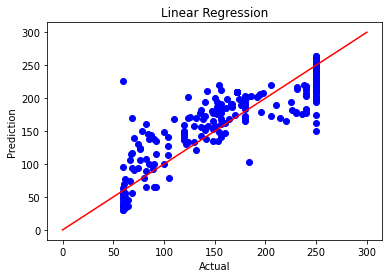

LR 30.219587442792314 0.7989289038019259 22.24289600688714


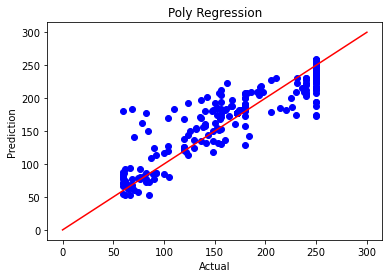

Poly  24.259191241316184 0.8704238058801991 15.71544320790826


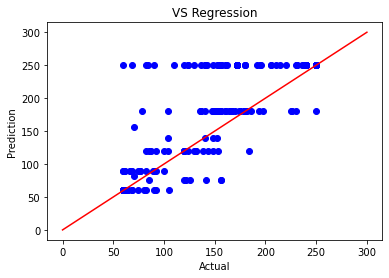

VS  43.79776138616019 0.5776461962145203 23.048780487804876


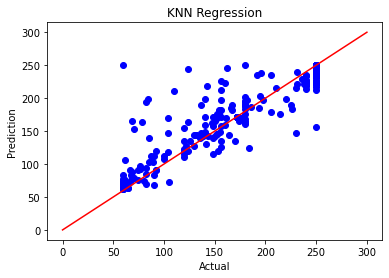

KNN  26.53967864694158 0.8449171036397065 13.478963414634148


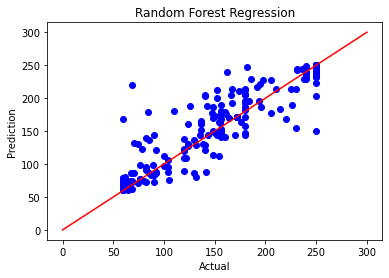

RF  22.943585372737573 0.8840968725529004 11.542682926829269


In [10]:
url = "datacap1&2.csv"
data = pd.read_csv(url)


file_name= '/Users/myatwin/REU/Project/ObjRec/automl/efficientdet/Distance_Jupyter/compare_model.csv'
csv_columns = ['condition','RMSE', 'MAE', 'r2']
raw_data = {}

df = pd.DataFrame(raw_data, columns = csv_columns)
# df.to_csv(raw_data)
# predictors = ["y_max","x_min", "y_min", "x_max", "class_number", "prediction"]
predictors = ["f1", "f2", "class_number", "prediction"]
# predictors = ["y_min_sqrt", "x_min_sqrt", "y_max_sqrt", "x_max_sqrt", "class_number", "prediction"]

# training/testing
X = data[predictors].values
y = data["distance"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# running models
L_RMSE, L_r2, L_MAE = linear(X_train,X_test, y_train, y_test)
P_RMSE, P_r2, P_MAE = polynomial(X_train,X_test, y_train, y_test, 3)
VS_RMSE, VS_r2, VS_MAE = vector_space(X_train,X_test, y_train, y_test)
KNN_RMSE, KNN_r2, KNN_MAE = k_nearest_neighbor(X_train,X_test, y_train, y_test, 10)
RF_RMSE, RF_r2, RF_MAE = random_forest(X_train,X_test, y_train, y_test)

# saving model results into csv 
raw_data = { 
            'condition': str(predictors),   
            'RMSE': list([L_RMSE, P_RMSE, VS_RMSE, KNN_RMSE, RF_RMSE]),
            'MAE': list([L_MAE, P_MAE, VS_MAE, KNN_MAE, RF_MAE]), 
            'r2': list([L_r2, P_r2, VS_r2, KNN_r2, RF_r2])
            }  
df = pd.DataFrame(raw_data, columns = csv_columns)
df.to_csv(file_name, mode = 'a', header = False)


# bar graphs

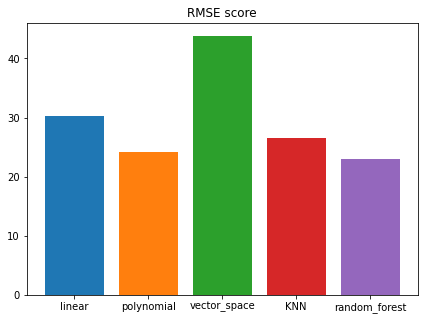

In [11]:
fields = ["linear", "polynomial", "vector_space", "KNN", "random_forest"]
# lin = data[data["class number"]==1]["linear"]
        
RMSE = [L_RMSE,P_RMSE, VS_RMSE, KNN_RMSE, RF_RMSE]
r2 = [L_r2,P_r2, VS_r2, KNN_r2, RF_r2]
MAE = [L_MAE,P_MAE, VS_MAE, KNN_MAE, RF_MAE]

plt.figure(figsize=(7, 5))
plt.margins(x=0.05)
plt.title(f"RMSE score")
for ind, error in enumerate(RMSE):
    plt.bar(fields[ind],error)

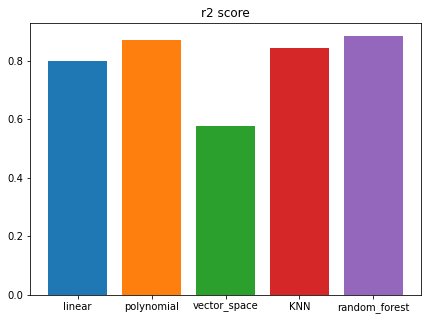

In [12]:
fields = ["linear", "polynomial", "vector_space", "KNN", "random_forest"]
# lin = data[data["class number"]==1]["linear"]
        
RMSE = [L_RMSE,P_RMSE, VS_RMSE, KNN_RMSE, RF_RMSE]
r2 = [L_r2,P_r2, VS_r2, KNN_r2, RF_r2]
MAE = [L_MAE,P_MAE, VS_MAE, KNN_MAE, RF_MAE]
error_list = [RMSE, r2, MAE]

plt.figure(figsize=(7, 5))
plt.margins(x=0.05)
plt.title(f"r2 score")
for ind, error in enumerate(r2):
    plt.bar(fields[ind],error)

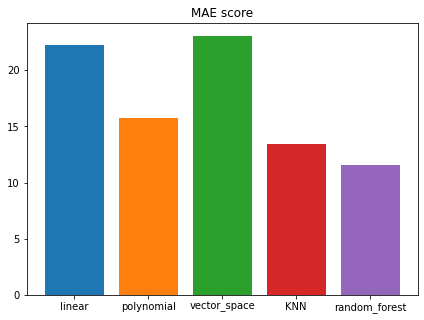

In [13]:
fields = ["linear", "polynomial", "vector_space", "KNN", "random_forest"]
# lin = data[data["class number"]==1]["linear"]
        
RMSE = [L_RMSE,P_RMSE, VS_RMSE, KNN_RMSE, RF_RMSE]
r2 = [L_r2,P_r2, VS_r2, KNN_r2, RF_r2]
MAE = [L_MAE,P_MAE, VS_MAE, KNN_MAE, RF_MAE]
error_list = [RMSE, r2, MAE]

plt.figure(figsize=(7, 5))
plt.margins(x=0.05)
plt.title(f"MAE score")
for ind, error in enumerate(MAE):
    plt.bar(fields[ind],error)

In [23]:
# # this will empty the csv file
# file_name= '/Users/myatwin/REU/Project/ObjRec/automl/efficientdet/Distance_Jupyter/compare_model.csv'
# df = open(file_name, "w+")